In [1]:
import sys
import pandas as pd
#sys.path.append('/Users/Pradap/Documents/Research/Python-Package/enrique/')
sys.path.append('/scratch/pradap/python-work/enrique/')

In [2]:
import magellan as mg
mg.init_jvm()

True

In [3]:
wal = mg.read_csv('../magellan/datasets/books/walmart.csv',
                  dtype={'isbn': pd.np.str, 'pages': pd.np.str, 'volume': pd.np.str, 'editionNum': pd.np.str},
                  low_memory=False, key='id')

bwk = mg.read_csv('../magellan/datasets/books/bowker.csv',
                  dtype={'isbn': pd.np.str, 'pages': pd.np.str, 'volume': pd.np.str, 'editionNum': pd.np.str},
                  low_memory=False, key='id')

In [4]:
ab = mg.AttrEquivalenceBlocker()
candset = ab.block_tables(bwk, wal, 'isbn', 'isbn', ['title', 'author'], ['title', 'author'])

feat_table = mg.get_features_for_blocking(bwk, wal)

sample_cset = mg.sample_one_table(candset, 30)


In [6]:
label_cset = mg.label(sample_cset, 'gold_label')

In [7]:
label_cset.save_table('book_label.pkl')

In [8]:
label_cset = mg.load_table('book_label.pkl')
#label_cset.set_property('ltable', bwk)
#label_cset.set_property('rtable', wal)


In [9]:
fv = mg.extract_feat_vecs(label_cset, feat_table=feat_table, attrs_after=['gold_label'])

dt = mg.DTMatcher(random_state=81)
dt.fit(table=fv, exclude_attrs=['_id', 'ltable.id', 'rtable.id', 'gold_label'], target_attr='gold_label')

In [10]:
mg.visualize_tree(dt, fv.columns, ['_id', 'ltable.id', 'rtable.id', 'gold_label'])

Execute the following command in IPython command prompt:

from IPython.display import Image
Image(filename='dt_.png') 


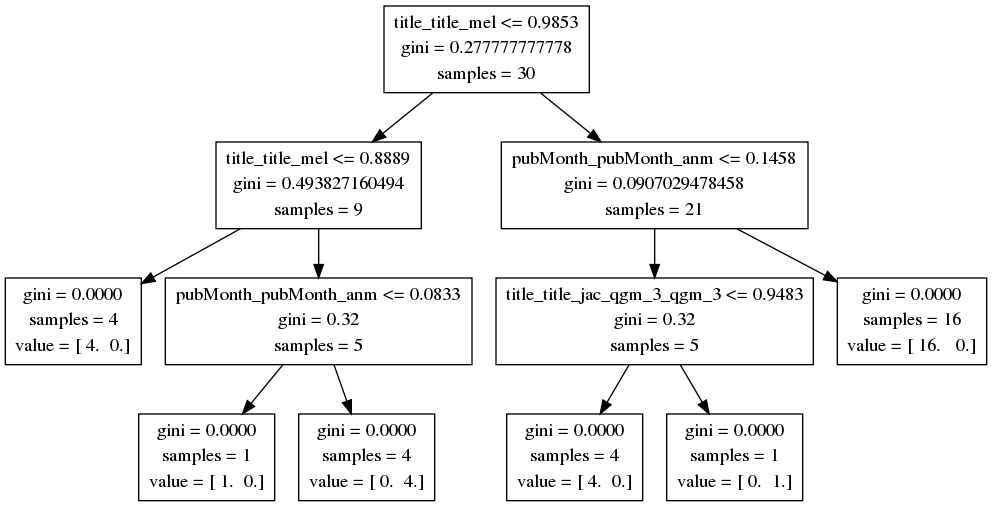

In [11]:
from IPython.display import Image
Image(filename='dt_.png')

In [23]:
mg.debug_dt(dt, b.ix[9780028348261], w.ix[5087512], feat_table, fv.columns, ['_id', 'ltable.id', 'rtable.id', 'gold_label'])

    title_title_mel <= 0.985327124596 is True (  value : 0.944444444444)
    title_title_mel <= 0.888888835907 is False (  value : 0.944444444444)
    pubMonth_pubMonth_anm <= 0.0833333358169 is False (  value : 1.0)
Match status : True


In [22]:
b = bwk.set_index('id', drop=False)
w = wal.set_index('id', drop=False)

In [19]:
b.ix[9780028348261]

title           Geometry : Concepts and Applications
author                             McGraw-Hill Staff
numAuthors                                         1
binding                                    Paperback
publisher               McGraw-Hill Higher Education
isbn                                   9780028348261
pubYear                                         2000
pubMonth                                           6
pubDay                                             1
editionNum                                       NaN
pages                                            NaN
volume                                           NaN
lang                                             ENG
editionDescr                                     NaN
series                                           NaN
upc                                              NaN
Name: 9780028348261, dtype: object

In [20]:
w.ix[5087512]

title           Geometry: Concepts and Applications, Study Gui...
author                                                McGraw-Hill
numAuthors                                                      1
binding                                                 Paperback
publisher                                     McGraw-Hill/Glencoe
isbn                                                9780028348261
pubYear                                                      2000
pubMonth                                                        6
pubDay                                                          1
editionNum                                                    STG
pages                                                         NaN
volume                                                        NaN
lang                                                          ENG
editionDescr                                                  NaN
category        Books Books/ARCHIVE/Textbooks/Mathematics/Geom...
upc11     

In [26]:
df = sample_cset.to_dataframe()

In [29]:
df1 = df.set_index(['ltable.id', 'rtable.id'], drop=False)

In [33]:
df1.ix[9780028348261, 5087513]

IndexError: index 5087513 is out of bounds for axis 0 with size 7

In [36]:
(9780028348261, 5087513) in list(df1.index.values)

False

In [13]:
wal.ix[1]

id                                             3659464
title           Software Engineering Quality Practices
author                              Kandt, Ronald Kirk
numAuthors                                           1
binding                                      Hardcover
publisher                        Auerbach Publications
isbn                                     9780849346330
pubYear                                           2005
pubMonth                                            11
pubDay                                               1
editionNum                                         NaN
pages                                              256
volume                                             NaN
lang                                               ENG
editionDescr                                       NaN
category               Books/ARCHIVE/Books Misc  Books
upc11                          97808493463 78084934633
upc12                        780849346330 978084934633
upc13     